<a href="https://colab.research.google.com/github/igor531205/statistic/blob/main/statistic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм. Вариант 10***

## Методы статистической обработки информации.
### Статистический анализ категориальных признаков и проверка гипотез однородности.

---

* Данные [addicts.xlsx](https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx), вариант 10. Для каждой из трех независимых категориальных переменных (intpla, ha, se) исследовать таблицы сопряженности с зависимой переменной end.

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact, levene, ttest_ind, \
                        f_oneway, bartlett, mannwhitneyu, ttest_rel, wilcoxon
from statsmodels.stats.contingency_tables import mcnemar, cochrans_q
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import LabelEncoder

*Загружаем данные по ссылке*

In [ ]:
# ссылка на данные
link = 'https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx'

addicts_sheet_name = 'addicts'

# Считываем данные
addicts=pd.read_excel(link, sheet_name=addicts_sheet_name, usecols=['intpla', 'ha', 'se', 'end'], index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
addicts.head()

,intpla,ha,se,end
0,1,1.0,0.0,0.0
1,2,0.0,0.0,0.0
2,1,0.0,0.0,0.0
3,1,1.0,0.0,0.0
4,2,0.0,0.0,0.0


*Проверим пропущенные значения*

In [ ]:
addicts.isna().sum()

intpla    0
ha        2
se        2
end       1
dtype: int64

*Заполним пропущенные значения медианными значениями*

In [ ]:
# Заполнение пропущенных значений для каждого столбца
for col in addicts.columns:
    mode_value = addicts[col].mode().iloc[0]
    addicts[col].fillna(mode_value, inplace=True)

# Повторная проверка
addicts.isna().sum()

intpla    0
ha        0
se        0
end       0
dtype: int64

---

Проверить гипотезы о независимости по критерию хи-квадрат и точному критерию Фишера. Представить условные вероятности и значимости их отличия.

---

In [ ]:
# Функция для нахождения хи-квадрат и критерия Фишера для проверки гипотезы о независимости
def perform_tests(data, col, col2='end'):
    contingency_table = pd.crosstab(data[col], data[col2]) # Создание таблицы сопряженности
    chi2, p_chi2, _, _ = chi2_contingency(contingency_table) # Расчет хи-квадрат
    try: # Точный критерий Фишера применим только для таблиц 2x2
        _, p_fisher = fisher_exact(contingency_table)
    except ValueError: # Если таблица не 2х2
        p_fisher = str('Критерий Фишера не применим')
    probs = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Расчет условных вероятностей
    return contingency_table, chi2, p_chi2, p_fisher, probs

In [ ]:
# Функция вывода на экран хи-квадрат и критерия Фишера
def view(feature, contingency_table, chi2, p_chi2, p_fisher, probs):
  print(f'Проверка гипотезы о независимости для признака {feature}:\n')
  print(f'Построение таблицы сопряженности:\n{contingency_table}\n')
  print(f'Критерий хи-квадрат: {chi2:.5f}\n')
  print(f'Значение p-value: {p_chi2:.5f}\n')
  print(f'Критерий Фишера: {p_fisher if isinstance(p_fisher, str) else f"{p_fisher:.5f}"}\n')
  print(f'Условные вероятности:\n{probs.round(5)}\n')

*Проверка гипотезы о независимости признака intpla на итог лечения end*

In [ ]:
feature_intpla = 'intpla'
ct_intpla, chi2_intpla, p_chi2_intpla, p_fisher_intpla, probs_intpla = perform_tests(addicts, feature_intpla)

view(feature_intpla, ct_intpla, chi2_intpla, p_chi2_intpla, p_fisher_intpla, probs_intpla)

Проверка гипотезы о независимости для признака intpla:

Построение таблицы сопряженности:
end     0.0  1.0
intpla          
1        96   45
2       107   32

Критерий хи-квадрат: 2.34857

Значение p-value: 0.12540

Критерий Фишера: 0.10888

Условные вероятности:
end         0.0      1.0
intpla                  
1       0.68085  0.31915
2       0.76978  0.23022



Проанализируем результаты влияния признака intpla (место лечения) на итог лечения (end).

Анализ таблицы сопряженности:

*   кто лечился амбулаторно (intpla = 1) 45 успешно вылечились, 96 не вылечились;
*   кто лечился в диспансере (intpla = 2) 32 успешно вылечились, 107 не вылечились.

Критерий хи-квадрат:

*   значение p-value больше 0.05, нет оснований отвергнуть гипотезу о независимости между intpla и end. Место лечения не влияет на результат лечения.

Точный критерий Фишера:

*   точный критерий Фишера также подтверждает, что нет оснований отвергать нулевую гипотезу о независимости.

Условные вероятности:

*   вероятность успешного выздоровления для тех кто лечился амбулаторно (intpla = 1) 31.9%;
*   вероятность успешного выздоровления для тех кто лечился в диспансере (intpla = 2) 23.0%.

*Проверка гипотезы о независимости признака ha на итог лечения end*

In [ ]:
feature_ha = 'ha'
ct_ha, chi2_ha, p_chi2_ha, p_fisher_ha, probs_ha = perform_tests(addicts, feature_ha)

view(feature_ha, ct_ha, chi2_ha, p_chi2_ha, p_fisher_ha, probs_ha)

Проверка гипотезы о независимости для признака ha:

Построение таблицы сопряженности:
end  0.0  1.0
ha           
0.0  147   66
1.0   56   11

Критерий хи-квадрат: 4.71924

Значение p-value: 0.02983

Критерий Фишера: 0.01929

Условные вероятности:
end      0.0      1.0
ha                   
0.0  0.69014  0.30986
1.0  0.83582  0.16418



Проанализируем результаты влияния признака ha (использование препаратов, вызывающих галлюцинации) на итог лечения (end).

Анализ таблицы сопряженности:

*   кто принимал препараты (ha = 1) 11 успешно вылечились, 56 не вылечились;
*   кто не принимал препараты (ha = 0) 66 успешно вылечились, 147 не вылечились.

Критерий хи-квадрат:

*   значение p-value меньше 0.05, есть основания отвергнуть гипотезу о независимости между ha и end. Использование препаратов, вызывающих галлюцинации влияет на результат лечения.

Точный критерий Фишера:

*   точный критерий Фишера также подтверждает статистическую значимость связи между ha и end.

Условные вероятности:

*   вероятность успешного выздоровления для тех кто принимал препараты (ha = 1) 16.4%;
*   вероятность успешного выздоровления для тех кто не принимал препараты (ha = 0) 30.1%.

*Проверка гипотезы о независимости признака ha на итог лечения se*

In [ ]:
feature_se = 'se'
ct_se, chi2_se, p_chi2_se, p_fisher_se, probs_se = perform_tests(addicts, feature_se)

view(feature_se, ct_se, chi2_se, p_chi2_se, p_fisher_se, probs_se)

Проверка гипотезы о независимости для признака se:

Построение таблицы сопряженности:
end  0.0  1.0
se           
0.0  150   65
1.0   53   12

Критерий хи-квадрат: 2.90330

Значение p-value: 0.08840

Критерий Фишера: 0.08058

Условные вероятности:
end      0.0      1.0
se                   
0.0  0.69767  0.30233
1.0  0.81538  0.18462



Проанализируем результаты влияния признака se (использование успокоительных средств) на итог лечения (end).

Анализ таблицы сопряженности:

*   кто использовал успокоительные (se = 1) 12 успешно вылечились, 53 не вылечились;
*   кто не использовал успокоительные (se = 0) 65 успешно вылечились, 150 не вылечились.

Критерий хи-квадрат:

*   значение p-value больше 0.05, нет оснований отвергнуть гипотезу о независимости между se и end. Использование успокоительных не влияет на результат лечения.

Точный критерий Фишера:

*   точный критерий Фишера также подтверждает, что нет оснований отвергать нулевую гипотезу о независимости.

Условные вероятности:

*   вероятность успешного выздоровления для тех кто использовал успокоительные (se = 1) 18.5%;
*   вероятность успешного выздоровления для тех кто не использовал успокоительные (se = 0) 30.2%.

---

Вычислить коэффициенты неопределенности для зависимой переменной end и
для каждой из независимых переменных по-отдельности.

---

Функция расчета энтропии по Шеннону:

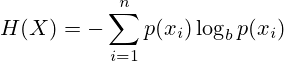

In [ ]:
# Функция для нахождения энтропии
def entropy(column):
    probs = column.value_counts(normalize=True)
    return -sum(probs * np.log2(probs))

Функция расчета взаимной информации:

image.png

In [ ]:
# Функция для нахождения взаимной информации
def mutual_information(x, y):
    joint_prob = pd.crosstab(x, y, normalize='all')
    x_prob = x.value_counts(normalize=True)
    y_prob = y.value_counts(normalize=True)
    mi = 0
    for xi in x_prob.index:
        for yi in y_prob.index:
            if joint_prob.at[xi, yi] > 0:
                mi += joint_prob.at[xi, yi] * np.log2(joint_prob.at[xi, yi] / (x_prob[xi] * y_prob[yi]))
    return mi

Функция расчета коэффициентов неопределенности для зависимой переменной и для независимых признаках по-отдельности

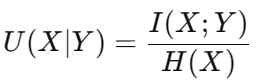
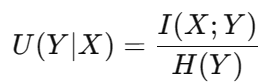

In [ ]:
# Функция расчета коэффициентов неопределенности
def uncertainty_coefficients(x, y):
    mi = mutual_information(x, y)
    h_x = entropy(x)
    h_y = entropy(y)
    h_xy = entropy(pd.crosstab(x, y).stack())
    u_xy = mi / h_x if h_x else 0
    u_yx = mi / h_y if h_y else 0
    return u_xy, u_yx

In [ ]:
# Применение функций для каждого признака
for col in ['intpla', 'ha', 'se']:
    u_xy, u_yx = uncertainty_coefficients(addicts[col], addicts['end'])
    print(f"Коэффициенты неопределенности для {col}: U(X|Y)={u_xy:.5f}, U(Y|X)={u_yx:.5f}")

Коэффициенты неопределенности для intpla: U(X|Y)=0.00718, U(Y|X)=0.00846
Коэффициенты неопределенности для ha: U(X|Y)=0.01898, U(Y|X)=0.01776
Коэффициенты неопределенности для se: U(X|Y)=0.01213, U(Y|X)=0.01117


Для признака intpla (место лечения):
* U(X|Y) низкое значение, что указывает на слабую зависимость между местом лечения и итогом лечения;
* U(Y|X) низкое значение, что указывает на слабую зависимость между итогом лечения и местом лечения.

Для признака ha (использование препаратов, вызывающих галлюцинации):
* U(X|Y) низкое значение, что указывает на слабую зависимость между использованием препаратов и итогом лечения;
* U(Y|X) низкое значение, что указывает на слабую зависимость между итогом лечения и использованием препаратов.

Для признака se (использование успокоительных средств):
* U(X|Y) низкое значение, что указывает на слабую зависимость между использованием успокоительных и итогом лечения;
* U(Y|X) низкое значение, что указывает на слабую зависимость между итогом лечения и использованием успокоительных.

Все три коэффициента неопределенности указывают на относительно слабую связь между независимыми признаками и исходом лечения. Это может означать, что эти признаки не основные предикторы исхода лечения.

---

Вычислить коэффициенты неопределенности для зависимой переменной end и
для всех трех независимых переменных одновременно.

---

In [ ]:
# Создание новой переменной, объединяющей значения intpla, ha, se
combined_features = addicts['intpla'].astype(str) + "_" + addicts['ha'].astype(str) + "_" + addicts['se'].astype(str)

# Вычисление коэффициентов неопределенности
u_xy_comb, u_yx_comb = uncertainty_coefficients(combined_features, addicts['end'])

# Вывод результатов
print(f"Коэффициенты неопределенности для комбинированных признаков: U(X|Y)={u_xy_comb:.5f}, U(Y|X)={u_yx_comb:.5f}")

Коэффициенты неопределенности для комбинированных признаков: U(X|Y)=0.01254, U(Y|X)=0.03444


Для комбинированных признаков intpla, ha, se:
* U(X|Y) низкое значение, что указывает на слабую зависимость между комбинацией признаков и итогом лечения;
* U(Y|X) низкое значение, что указывает на слабую зависимость между итогом лечения и комбинацией признаков.

Низкие значения коэффициентов неопределенности указывают на сложность предсказания исходов лечения на основе этих трех переменных. Эти признаки не основные предикторы исхода лечения.

---

* Данные [addicts.xlsx](https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx), вариант 10. Метрическая переменная (rubsex), категориальная с двумя градациями (st), категориальная с четырьмя градациями (educat).

---

In [ ]:
# ссылка на данные
link = 'https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx'

addicts_sheet_name = 'addicts'

# Считываем данные
addicts=pd.read_excel(link, sheet_name=addicts_sheet_name, usecols=['rubsex', 'st', 'educat'], index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
addicts.head()

,educat,st,rubsex
0,1,0.0,4
1,4,0.0,5
2,2,0.0,1
3,2,0.0,4
4,2,0.0,4


*Проверим пропущенные значения*

In [ ]:
addicts.isna().sum()

educat    0
st        1
rubsex    0
dtype: int64

*Заполним пропущенные значения медианными значениями*

In [ ]:
# Заполнение пропущенных значений для каждого столбца
for col in addicts.columns:
    mode_value = addicts[col].mode().iloc[0]
    addicts[col].fillna(mode_value, inplace=True)

# Повторная проверка
addicts.isna().sum()

educat    0
st        0
rubsex    0
dtype: int64

---

* Проверить гипотезу о равенстве дисперсий двух выборок, привести несмещенные оценки дисперсии и значимость критерия Фишера равенства дисперсий с выводом о том, считаем дисперсии разными или говорим о том, что различие между дисперсиями можно объяснить случайностью, и, согласно полученному выводу, применить соответствующий критерий Стьюдента для проверки равенства средних. Группирующая переменная st.

---

*Группировка данных по переменной st и расчёт дисперсий для каждой группы*

In [ ]:
unique_st_values = addicts['st'].unique()  # Получение уникальных значений для признака st
grouped_st = {}  # Словарь для хранения данных по группам
grouped_variance_st = {} # Словарь для хранения дисперсий для каждой группы

for value in unique_st_values:
    grouped_st[value] = addicts[addicts['st'] == value]['rubsex']
    grouped_variance_st[value] = grouped_st[value].var(ddof=1)
    print(f'Дисперсия для группы {value} = {grouped_variance_st[value]:.5f}')

Дисперсия для группы 0.0 = 4.65235
Дисперсия для группы 1.0 = 5.57932


*Критерий Фишера равенства дисперсий*

In [ ]:
# Расчет критерия Фишера равенства дисперсий
f_value_levene, p_value_levene = levene(*grouped_st.values(), center='mean')

print(f'F-value: {f_value_levene:.5f}, p-value: {p_value_levene:.5f}')

F-value: 0.90919, p-value: 0.34116


*   F-value: значение близкое к 1 говорит о том, что дисперсии по группам в целом схожи;
*   p-value: значение p-value больше 0.05, нет оснований отвергнуть нулевую гипотезу о том, что дисперсии в группах равны.

*Критерий Стьюдента равенства дисперсий*

In [ ]:
# Расчет критерия Стьюдента равенства дисперсий
t_stat, p_value_ttest = ttest_ind(*grouped_st.values(), equal_var=True)

t_stat, p_value_ttest
print(f't-statistic: {t_stat:.5f}, p-value: {p_value_ttest:.5f}')

t-statistic: -2.57693, p-value: 0.01048


*   t-statistic: отрицательное значение t-статистики говорит о том, что среднее значение переменной в нулевой группе ниже, чем в первой группе;
*   p-value: значение p-value меньше 0.05, поэтому мы отвергаем нулевую гипотезу о равенстве средних между двумя группами, есть статистически значимые различия между средними значениями групп.

---

* Применить однофакторный дисперсионный анализ в случае фактора с четырьмя градациями и множественные сравнения с разными поправками. Проверить гипотезу о равенстве дисперсий при помощи критерия Ливиня и Бартлетта.

---

*Однофакторный дисперсионный анализ*

In [ ]:
unique_educat_values = addicts['educat'].unique()  # Получение уникальных значений для признака educat
grouped_educat = {}  # Словарь для хранения данных по группам

for value in unique_educat_values:
    grouped_educat[value] = addicts[addicts['educat'] == value]['rubsex']

# Выполнение однофакторного дисперсионного анализа
anova_results = f_oneway(*grouped_educat.values())
anova_results

F_onewayResult(statistic=0.5266891524144115, pvalue=0.6642949601271322)

Результаты однофакторного дисперсионного анализа показывают, что нет статистически значимых различий в оценках риска в сексуальных связях (rubsex) между различными группами разделенными по образованию.

*Проверить гипотезу о равенстве дисперсий при помощи критерия Ливиня и Бартлетта.*

In [ ]:
# Критерий Ливиня на равенство дисперсий
levene_test = levene(*grouped_educat.values())

# Критерий Бартлетта на равенство дисперсий
bartlett_test = bartlett(*grouped_educat.values())

print(f'Критерий Ливиня на равенство дисперсий: {levene_test}')
print(f'Критерий Бартлетта на равенство дисперсий: {bartlett_test}')

Критерий Ливиня на равенство дисперсий: LeveneResult(statistic=0.7848962462370895, pvalue=0.5032103281709439)
Критерий Бартлетта на равенство дисперсий: BartlettResult(statistic=3.39113005393191, pvalue=0.33515909866553284)


Оба критерия не отвергают нулевую гипотезу о равенстве дисперсий между группами, а это указывает на то, что дисперсии оценок риска в сексуальных связях (rubsex) не различаются статистически значимо между группами разделенными по образованию.

*Повторить обработку с применением непараметрических аналогов (критерий
Вилкоксона).*

In [ ]:
# Критерий Вилкоксона на равенство дисперсий
wilcoxon_test = mannwhitneyu(*grouped_st.values(), alternative='two-sided')
wilcoxon_test

MannwhitneyuResult(statistic=3160.0, pvalue=0.019279690743914085)

Критерий Вилкоксона показал наличие статистически значимых различий в оценках риска в сексуальных связях (rubsex) между двумя группами разделенными на использование стимулирующих средств (st).

---

* Данные [dataNF.xls](https://github.com/igor531205/statistic/raw/main/data/dataNF.xls), вариант 10. Для первых двух зависимых переменных (BDI.1, BDI.2, BDI.6, BDI.7, данные dataNF.xls) найти med1 медиану в первой точке и преобразовать признаки в дихотомические в зависимости от положения относительно медианы med1.

---

In [ ]:
# ссылка на данные
link = 'https://github.com/igor531205/statistic/raw/main/data/dataNF.xls'

data_sheet_name = 'bdi'

# Считываем данные
datas=pd.read_excel(link, sheet_name=data_sheet_name,
                    usecols=['BDI.1', 'BDI.2', 'BDI.6', 'BDI.7', 'PRCOD.1', 'SEX.1'],
                    index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
datas.head()

,PRCOD.1,SEX.1,BDI.1,BDI.2,BDI.6,BDI.7
0,Placebo+Placebo,male,NaN,NaN,NaN,NaN
1,Placebo+Framex,male,18.0,5.0,NaN,NaN
2,NLTX+Framex,female,12.0,8.0,NaN,NaN
3,Placebo+Framex,male,14.0,12.0,NaN,NaN
4,NLTX+Placebo,male,19.0,7.0,0.0,NaN


In [ ]:
# Заполним пропущенные значения средними значениями
features = ['BDI.1', 'BDI.2', 'BDI.6', 'BDI.7']
datas.fillna(datas[features].mean(), inplace=True)
datas.head()

,PRCOD.1,SEX.1,BDI.1,BDI.2,BDI.6,BDI.7
0,Placebo+Placebo,male,20.35061,13.003984,5.427536,4.664062
1,Placebo+Framex,male,18.00000,5.000000,5.427536,4.664062
2,NLTX+Framex,female,12.00000,8.000000,5.427536,4.664062
3,Placebo+Framex,male,14.00000,12.000000,5.427536,4.664062
4,NLTX+Placebo,male,19.00000,7.000000,0.000000,4.664062


*Нахождение med1 медиан*

In [ ]:
# Расчет медианы для BDI.1, BDI.2, BDI.6, BDI.7
medians = datas[features].median()

for feature in features:
    print(f'Медиана для признака {feature} = {medians[feature]:.1f}')

Медиана для признака BDI.1 = 20.0
Медиана для признака BDI.2 = 13.0
Медиана для признака BDI.6 = 5.4
Медиана для признака BDI.7 = 4.7


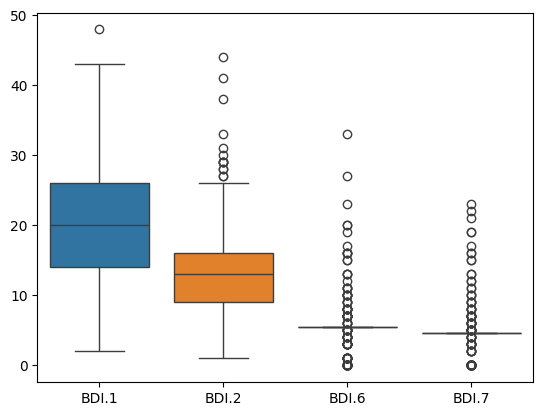

In [ ]:
sns.boxplot(data=datas[features])
plt.show()

*Преобразование признаков в дихотомические в зависимости от положения относительно медианы med1*

In [ ]:
# Преобразование в дихотомические признаки
dichotomous = (datas[features] > medians).astype(int)

dichotomous.head()

,BDI.1,BDI.2,BDI.6,BDI.7
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


---

* Применить критерии Мак-Немара (первая и последняя точки наблюдения) и Кохрена
для проверки значимости изменений в динамике.

---

*Критерий Мак-Немара (первая и последняя точки наблюдения)*

In [ ]:
# Подготовка данных для критерия Мак-Немара (первая и последняя точки)
data_for_mcnemar = dichotomous.dropna(subset=['BDI.1', 'BDI.7'])

# Применение критерия Мак-Немара
contingency_table = pd.crosstab(data_for_mcnemar['BDI.1'], data_for_mcnemar['BDI.7'])
mcnemar_test = mcnemar(contingency_table, exact=False, correction=True)
mcnemar_result = (mcnemar_test.statistic, mcnemar_test.pvalue)

mcnemar_result

(65.36170212765957, 6.233865540949093e-16)

Критерий Мак-Немара показал значимые изменения между первой (BDI.1) и последней (BDI.7) точками наблюдения с низким p-значением, что указывает на статистическую значимость изменений.

*Критерий Кохрена*

In [ ]:
# Применение критерия Кохрена
cochran_test = cochrans_q(dichotomous)
cochran_result = (cochran_test.statistic, cochran_test.pvalue)

cochran_result

(124.15950920245399, 9.805997076698726e-27)

Критерий Кохрена также показал значимые изменения в динамике между всеми четырьмя точками (BDI.1, BDI.2, BDI.6, BDI.7) с низким p-значением, что говорит о статистической значимости наблюдаемых изменений.

---

* Для первых двух зависимых переменных (BDI.1, BDI.2, данные dataNF.xls) проверить
однородность изменений во времени по критерию Стьюдента для зависимых
выборок и по ранговому критерию Вилкоксона.

---

In [ ]:
# Подготовка данных
features = ['BDI.1', 'BDI.2']
filtered_data = datas[features].dropna()

*Критерий Стьюдента*

In [ ]:
# Критерий Стьюдента для зависимых выборок
t_test_results = ttest_rel(filtered_data['BDI.1'], filtered_data['BDI.2'])
t_test_results

TtestResult(statistic=16.66759142952914, pvalue=1.024445568287824e-45, df=331)

Критерий Стьюдента для зависимых выборок показал значимое различие между признаками BDI.1 и BDI.2, что указывает на то, что средние значения между этими двумя точками времени статистически значимо различаются.

*Критерий Вилкоксона*

In [ ]:
# Критерий Вилкоксона
wilcoxon_results = wilcoxon(filtered_data['BDI.1'], filtered_data['BDI.2'])
wilcoxon_results

WilcoxonResult(statistic=4570.5, pvalue=2.995784773997346e-38)

Критерий Вилкоксона также показал значимые различия между BDI.1 и BDI.2, что подтверждает наличие значимых изменений между этими двумя моментами времени.

---

* Для зависимых переменных (BDI.1, BDI.2, BDI.6, BDI.7, данные dataNF.xls) с факторами PRCOD.1 и SEX.1 выполнить ANOVA Repeated Measures. Проверить значимость факторов PRCOD.1 и SEX.1, времени и эффектов взаимодействия. В выводах должны быть представлены средние, р-значения и фраза о том, с различие значимо или может быть объяснено случайностью и с каким уровнем значимости.

---

In [ ]:
# Переименование колонок для избежания проблем с "." в имени признака
new_column_names = {'BDI.1': 'BDI_1', 'BDI.2': 'BDI_2', 'BDI.6': 'BDI_6', 'BDI.7': 'BDI_7',
                    'PRCOD.1': 'PRCOD_1', 'SEX.1': 'SEX_1'}
datas = datas.rename(columns=new_column_names)
datas.head()

,PRCOD_1,SEX_1,BDI_1,BDI_2,BDI_6,BDI_7
0,Placebo+Placebo,male,20.35061,13.003984,5.427536,4.664062
1,Placebo+Framex,male,18.00000,5.000000,5.427536,4.664062
2,NLTX+Framex,female,12.00000,8.000000,5.427536,4.664062
3,Placebo+Framex,male,14.00000,12.000000,5.427536,4.664062
4,NLTX+Placebo,male,19.00000,7.000000,0.000000,4.664062


In [ ]:
# Преобразуем данные в формат для анализа
long_data = pd.melt(datas, id_vars=['PRCOD_1', 'SEX_1'], value_vars=['BDI_1', 'BDI_2', 'BDI_6', 'BDI_7'],
                    var_name='Time', value_name='BDI')

# Преобразуем время в категориальный тип
long_data['Time'] = long_data['Time'].astype('category')

long_data

,PRCOD_1,SEX_1,Time,BDI
0,Placebo+Placebo,male,BDI_1,20.350610
1,Placebo+Framex,male,BDI_1,18.000000
2,NLTX+Framex,female,BDI_1,12.000000
3,Placebo+Framex,male,BDI_1,14.000000
4,NLTX+Placebo,male,BDI_1,19.000000
...,...,...,...,...
1323,Placebo+Placebo,male,BDI_7,7.000000
1324,NLTX+Placebo,male,BDI_7,4.664062
1325,NLTX+Placebo,male,BDI_7,16.000000
1326,NLTX+Placebo,male,BDI_7,0.000000


*Выполнение ANOVA Repeated Measures*

In [ ]:
# Выполнение ANOVA Repeated Measures
anova_results = AnovaRM(data=long_data, depvar='BDI', subject='PRCOD_1', within=['Time', 'SEX_1'], \
                        aggregate_func='mean').fit()

anova_results.summary()

,F Value,Num DF,Den DF,Pr > F
Time,361.7890,3.0000,9.0000,0.0000
SEX_1,8.1365,1.0000,3.0000,0.0650
Time:SEX_1,7.9528,3.0000,9.0000,0.0067


Время (Time): P-значение очень низкое, значит время оказывает статистически значимое влияние на уровень BDI, изменения в BDI в различные временные точки не могут быть случайными.

Пол (SEX_1): пол не оказывает статистически значимого влияния на уровень BDI, так как p-значение больше 0.05, значит любые различия в уровне BDI между полами могут быть случайными.

Взаимодействие времени и пола (Time:SEX_1): Взаимодействие между временем и полом является статистически значимым, а значит изменения в уровне BDI в различные временные точки, возможно, влияют по-разному на разные полы.

In [ ]:
# Выполнение ANOVA Repeated Measures
anova_results = AnovaRM(data=long_data, depvar='BDI', subject='SEX_1', within=['Time', 'PRCOD_1'], \
                        aggregate_func='mean').fit()

anova_results.summary()

,F Value,Num DF,Den DF,Pr > F
Time,81.4583,3.0000,3.0000,0.0023
PRCOD_1,3.5718,3.0000,3.0000,0.1618
Time:PRCOD_1,1.7906,9.0000,9.0000,0.1993


Время (Time): P-значение очень низкое, значит время оказывает статистически значимое влияние на уровень BDI, изменения в BDI в различные временные точки не могут быть случайными.

Фактор (PRCOD_1): фактор не оказывает статистически значимого влияния на уровень BDI, поскольку p-значение выше 0.05, любые обнаруженные различия в уровнях BDI могут быть случайными.

Взаимодействие времени и фактора PRCOD_1 (Time:PRCOD_1): Взаимодействие между временем и фактором PRCOD_1 также не является статистически значимым, так как p-значение выше 0.05, изменения в уровне BDI в различные временные точки не различаются существенно в зависимости от фактора PRCOD_1.

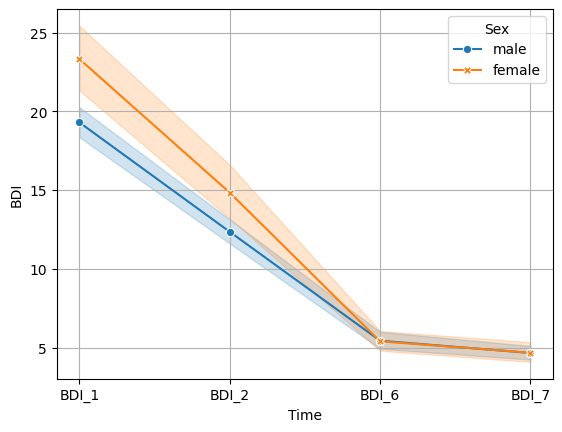

In [ ]:
sns.lineplot(data=long_data, x='Time', y='BDI', hue='SEX_1', style='SEX_1', markers=True, dashes=False)
plt.legend(title='Sex')
plt.grid(True)
plt.show()

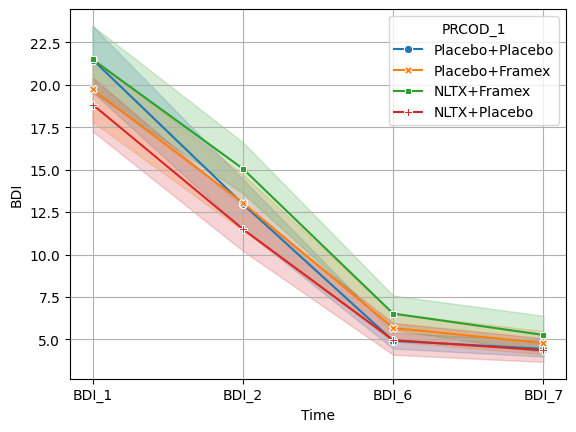

In [ ]:
sns.lineplot(data=long_data, x='Time', y='BDI', hue='PRCOD_1', style='PRCOD_1', markers=True, dashes=False)
plt.legend(title='PRCOD_1')
plt.grid(True)
plt.show()

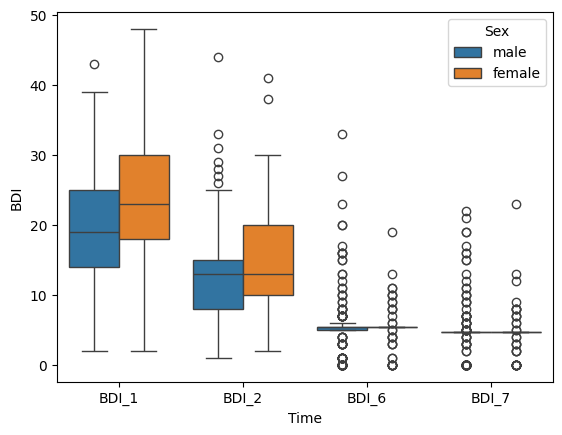

In [ ]:
sns.boxplot(data=long_data, x='Time', y='BDI', hue='SEX_1')
plt.legend(title='Sex')
plt.show()

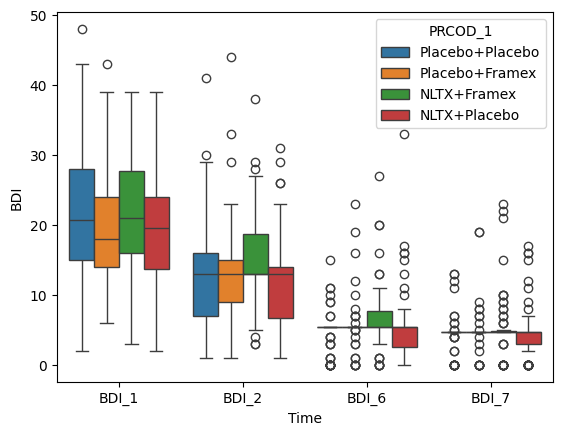

In [ ]:
sns.boxplot(data=long_data, x='Time', y='BDI', hue='PRCOD_1')
plt.legend(title='PRCOD_1')
plt.show()